# AIRLINE PASSENGER SATISFACTION

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [112]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [113]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [114]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [115]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [116]:
train.shape

(103904, 25)

In [117]:
train1=train["satisfaction"].value_counts()
train1

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

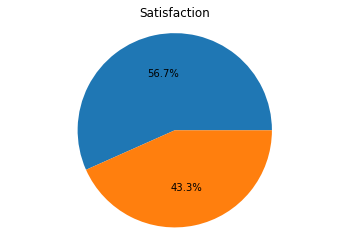

In [118]:
plt.pie(train1,autopct='%1.1f%%')
plt.title('Satisfaction')
plt.axis('equal')
plt.show()

Finding NULL values

In [119]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [120]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [121]:
train=train.dropna()
test=test.dropna()

In [122]:
train.columns = train.columns.str.replace(" ", "_")
test.columns = test.columns.str.replace(" ", "_")
train.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [123]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
train = train.iloc[:, 2:]
train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [125]:
test = test.iloc[:, 2:]
test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [126]:
train.Gender[train.Gender == 'Male'] = 1
train.Gender[train.Gender == 'Female'] = 2
train.Customer_Type[train.Customer_Type =="Loyal Customer"]=1
train.Customer_Type[train.Customer_Type =="disloyal Customer"]=2
train.Type_of_Travel[train.Type_of_Travel =="Personal Travel"]=1
train.Type_of_Travel[train.Type_of_Travel =="Business travel"]=2
train.Class[train.Class =="Business"]=1
train.Class[train.Class =="Eco"]=2
train.Class[train.Class =="Eco Plus"]=3

train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,13,1,3,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,2,25,2,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,1,26,2,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,2,1,25,2,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,1,61,2,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,2,23,2,2,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,1,1,49,2,1,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,1,2,30,2,1,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,2,2,22,2,2,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [127]:
test.Gender[test.Gender == 'Male'] = 1
test.Gender[test.Gender == 'Female'] = 2
test.Customer_Type[test.Customer_Type =="Loyal Customer"]=1
test.Customer_Type[test.Customer_Type =="disloyal Customer"]=2
test.Type_of_Travel[test.Type_of_Travel =="Personal Travel"]=1
test.Type_of_Travel[test.Type_of_Travel =="Business travel"]=2
test.Class[test.Class =="Business"]=1
test.Class[test.Class =="Eco"]=2
test.Class[test.Class =="Eco Plus"]=3

test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,2,1,52,2,2,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,2,1,36,2,1,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,1,2,20,2,2,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,1,1,44,2,1,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,2,1,49,2,2,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,2,34,2,1,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,1,1,23,2,1,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,2,1,17,1,2,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,1,1,14,2,1,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [128]:
X_train=train.iloc[:,:-1] #independent values
X_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,1,13,1,3,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,2,25,2,1,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,2,1,26,2,1,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,2,1,25,2,1,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,61,2,1,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,2,23,2,2,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0.0
103900,1,1,49,2,1,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,1,2,30,2,1,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,14.0
103902,2,2,22,2,2,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0.0


In [129]:
Y_train=train.iloc[:,-1] #dependent value
Y_train

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103594, dtype: object

In [130]:
X_test=test.iloc[:,:-1] #independent values
X_test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,2,1,52,2,2,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,2,1,36,2,1,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,1,2,20,2,2,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,1,1,44,2,1,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,2,1,49,2,2,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,2,34,2,1,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,1,1,23,2,1,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,2,1,17,1,2,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,1,1,14,2,1,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [131]:
Y_test=test.iloc[:,-1] #dependent value
Y_test

0                      satisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 25893, dtype: object

In [132]:
Y_train = train['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
Y_train

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103594, dtype: int64

In [133]:
Y_test = test['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
Y_test

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25893, dtype: int64

In [134]:
X_train = X_train.astype(float)
X_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1.0,1.0,13.0,1.0,3.0,460.0,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1.0,2.0,25.0,2.0,1.0,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,2.0,1.0,26.0,2.0,1.0,1142.0,2.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,2.0,1.0,25.0,2.0,1.0,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,1.0,1.0,61.0,2.0,1.0,214.0,3.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2.0,2.0,23.0,2.0,2.0,192.0,2.0,1.0,2.0,3.0,...,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0
103900,1.0,1.0,49.0,2.0,1.0,2347.0,4.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
103901,1.0,2.0,30.0,2.0,1.0,1995.0,1.0,1.0,1.0,3.0,...,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0
103902,2.0,2.0,22.0,2.0,2.0,1000.0,1.0,1.0,1.0,5.0,...,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0,0.0,0.0


In [135]:
X_test = X_test.astype(float)
X_test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,2.0,1.0,52.0,2.0,2.0,160.0,5.0,4.0,3.0,4.0,...,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,2.0,1.0,36.0,2.0,1.0,2863.0,1.0,1.0,3.0,1.0,...,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0
2,1.0,2.0,20.0,2.0,2.0,192.0,2.0,0.0,2.0,4.0,...,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0
3,1.0,1.0,44.0,2.0,1.0,3377.0,0.0,0.0,0.0,2.0,...,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0
4,2.0,1.0,49.0,2.0,2.0,1182.0,2.0,3.0,4.0,3.0,...,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1.0,2.0,34.0,2.0,1.0,526.0,3.0,3.0,3.0,1.0,...,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0
25972,1.0,1.0,23.0,2.0,1.0,646.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
25973,2.0,1.0,17.0,1.0,2.0,828.0,2.0,5.0,1.0,5.0,...,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0
25974,1.0,1.0,14.0,2.0,1.0,1127.0,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0


In [136]:
def normalizeFeatures(X):
    X_min = np.min(X)
    X_max = np.max(X)
    X_norm = (X - X_min) / (X_max - X_min)
    return X_norm

In [137]:
X_train=normalizeFeatures(X_train)
X_test=normalizeFeatures(X_test)
X_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0.0,0.0,0.076923,0.0,1.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,0.0,1.0,0.230769,1.0,0.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,1.0,0.0,0.243590,1.0,0.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,1.0,0.0,0.230769,1.0,0.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,0.0,0.0,0.692308,1.0,0.0,0.036955,0.6,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1.0,1.0,0.205128,1.0,0.5,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000
103900,0.0,0.0,0.538462,1.0,0.0,0.467690,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000
103901,0.0,1.0,0.294872,1.0,0.0,0.396607,0.2,0.2,0.2,0.6,...,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838
103902,1.0,1.0,0.192308,1.0,0.5,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000


<AxesSubplot:>

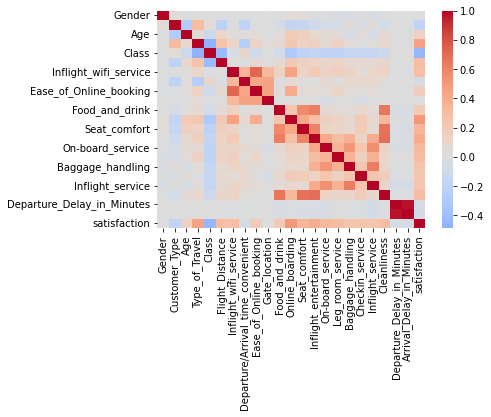

In [138]:
corr_matrix = pd.concat([X_train, Y_train], axis=1).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                     Specs        Score
4                    Class  6789.090798
3           Type_of_Travel  6477.091547
1            Customer_Type  2978.253098
11         Online_boarding  2941.851393
13  Inflight_entertainment  1738.302523
5          Flight_Distance  1604.960948
12            Seat_comfort  1276.976262
6    Inflight_wifi_service  1080.638591
14        On-board_service  1056.958025
15        Leg_room_service  1049.180914


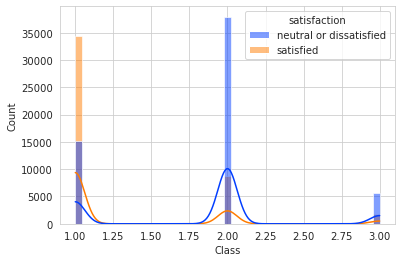

In [144]:
with sns.axes_style(style='whitegrid'):
    g = sns.histplot(x='Class',
                hue="satisfaction",
                data=train,kde=True,palette="bright")

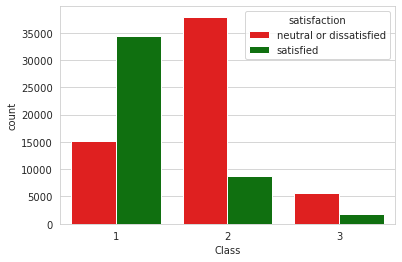

In [146]:
with sns.axes_style(style='whitegrid'):
    g = sns.countplot(x='Class',hue="satisfaction",
                data=train,palette=['Red', 'Green'])

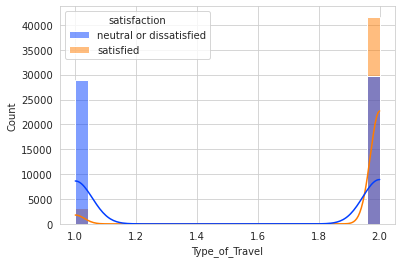

In [145]:
with sns.axes_style(style='whitegrid'):
    g = sns.histplot(x='Type_of_Travel',
                hue="satisfaction",
                data=train,kde=True,palette="bright")

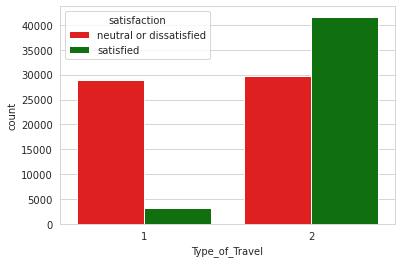

In [147]:
with sns.axes_style(style='whitegrid'):
    g = sns.countplot(x='Type_of_Travel',hue="satisfaction",
                data=train,palette=['Red', 'Green'])

In [149]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std

array([[-1.01515429, -0.47288331, -1.7455419 , ...,  1.30591327,
         0.26896611,  0.0729052 ],
       [-1.01515429,  2.1146866 , -0.95152625, ..., -1.74243151,
        -0.36068159, -0.23718437],
       [ 0.98507193, -0.47288331, -0.88535828, ...,  1.30591327,
        -0.38691691, -0.39222916],
       ...,
       [-1.01515429,  2.1146866 , -0.6206864 , ...,  0.54382707,
        -0.20326967, -0.03045799],
       [ 0.98507193,  2.1146866 , -1.15003016, ..., -1.74243151,
        -0.38691691, -0.39222916],
       [-1.01515429, -0.47288331, -0.81919031, ..., -1.74243151,
        -0.38691691, -0.39222916]])

In [150]:
from sklearn.decomposition import PCA
# Apply PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_test_pca

array([[-1.96203286, -1.14044628, -1.01089732, ...,  0.0539747 ,
         2.84760342,  0.37567677],
       [-1.96108199,  2.81570731,  0.94195534, ...,  0.61400421,
         0.67109843, -1.58507411],
       [ 3.61719498,  0.57208875, -0.35643355, ..., -0.50021139,
         0.40781031,  0.25218612],
       ...,
       [ 2.17938942, -0.66533045, -2.17597246, ...,  1.99397174,
        -1.69308344,  0.16022237],
       [-1.36846922,  0.43113204, -0.33138085, ..., -0.16891546,
        -1.18687133, -1.15308805],
       [ 4.63449487, -2.04039312,  2.14446905, ...,  1.71352237,
         1.29247735,  0.28512028]])

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameters to be tested in GridSearchCV
params = {'n_neighbors': [3, 5, 7,], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}

# Define the GridSearchCV object
grid = GridSearchCV(knn, params, cv=5)

# Fit the GridSearchCV object to the training data with PCA features
grid.fit(X_train_pca, Y_train)

# Predict using the GridSearchCV object on the testing data with PCA features
y_pred = grid.predict(X_test_pca)

# Print the classification report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.90     14528
           1       0.88      0.84      0.86     11365

    accuracy                           0.88     25893
   macro avg       0.88      0.88      0.88     25893
weighted avg       0.88      0.88      0.88     25893



In [ ]:
# Calculate accuracy
accuracy1 = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy1)

In [ ]:
# Assuming y_test and y_pred are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')

In [35]:
# Access the best hyperparameters
best_params = grid.best_params_
print(best_params)

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Define the GridSearchCV object
grid = GridSearchCV(nb_classifier, params, cv=5)

# Fit the GridSearchCV object to the training data with PCA features
grid.fit(X_train_pca, Y_train)

# Predict using the GridSearchCV object on the testing data with PCA features
y_pred = grid.predict(X_test_pca)

# Print the classification report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14528
           1       0.85      0.79      0.82     11365

    accuracy                           0.85     25893
   macro avg       0.85      0.84      0.85     25893
weighted avg       0.85      0.85      0.85     25893



In [ ]:
# Calculate accuracy
accuracy2 = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy2)

In [ ]:
# Assuming y_test and y_pred are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')

In [42]:
# Access the best hyperparameters
best_params = grid.best_params_
print(best_params)

{'var_smoothing': 1e-09}


# Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

params = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10]}

# Define the GridSearchCV object
grid = GridSearchCV(dtc, params, cv=5)

# Fit the GridSearchCV object to the training data with PCA features
grid.fit(X_train_pca, Y_train)

# Predict using the GridSearchCV object on the testing data with PCA features
y_pred = grid.predict(X_test_pca)

# Print the classification report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.92      0.90     14528
           1       0.90      0.85      0.87     11365

    accuracy                           0.89     25893
   macro avg       0.89      0.89      0.89     25893
weighted avg       0.89      0.89      0.89     25893



In [ ]:
# Calculate accuracy
accuracy3 = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy3)

In [ ]:
# Assuming y_test and y_pred are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')

In [45]:
# Access the best hyperparameters
best_params = grid.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_split': 2}


# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier()


# Fit the GridSearchCV object to the training data with PCA features
rf.fit(X_train_pca, Y_train)

# Predict using the GridSearchCV object on the testing data with PCA features
y_pred = rf.predict(X_test_pca)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     14528
           1       0.93      0.90      0.91     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.92      0.92     25893
weighted avg       0.93      0.93      0.93     25893



In [51]:
# Calculate accuracy
accuracy4 = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy4)

Accuracy: 0.9253852392538524


Text(0.5, 1.0, 'Confusion Matrix')

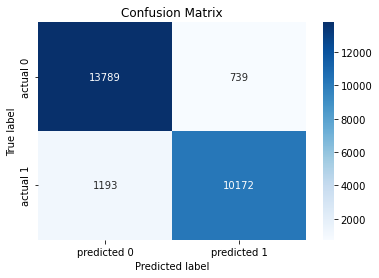

In [52]:
# Assuming y_test and y_pred are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
lr = LinearRegression()

# Define the parameter grid for GridSearchCV
params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2],
    'positive': [True, False]
}


# Define the GridSearchCV object
grid = GridSearchCV(lr, params, cv=5)

# Fit the GridSearchCV object to the training data with PCA features
grid.fit(X_train_pca, Y_train)

# Predict using the GridSearchCV object on the testing data with PCA features
y_pred = grid.predict(X_test_pca)
y_pred_thresh = [1 if val >= 0.5 else 0 for val in y_pred]

# Print the classification report
print(classification_report(Y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     14528
           1       0.84      0.81      0.82     11365

    accuracy                           0.85     25893
   macro avg       0.84      0.84      0.84     25893
weighted avg       0.85      0.85      0.85     25893



In [34]:
# Calculate accuracy
accuracy5 = accuracy_score(Y_test, y_pred_thresh)

# Print accuracy
print("Accuracy:", accuracy5)

Accuracy: 0.8460587803653498


Text(0.5, 1.0, 'Confusion Matrix')

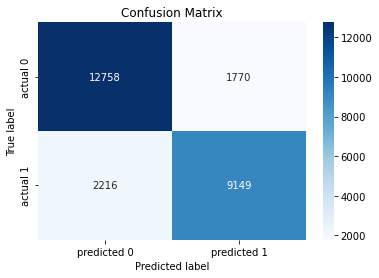

In [35]:
# Assuming y_test and y_pred_thresh are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred_thresh)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')

In [36]:
# Access the best hyperparameters
best_params = grid.best_params_
print(best_params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True, 'positive': False}


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
lor = LogisticRegression()

# Define the parameter grid for GridSearchCV
params = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Define the GridSearchCV object
grid = GridSearchCV(lor, params, cv=5)

# Fit the GridSearchCV object to the training data with PCA features
grid.fit(X_train_pca, Y_train)

# Predict using the GridSearchCV object on the testing data with PCA features
y_pred = grid.predict(X_test_pca)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     14528
           1       0.84      0.81      0.82     11365

    accuracy                           0.85     25893
   macro avg       0.85      0.84      0.85     25893
weighted avg       0.85      0.85      0.85     25893



In [47]:
# Calculate accuracy
accuracy6 = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy6)

Accuracy: 0.8481829065770672


Text(0.5, 1.0, 'Confusion Matrix')

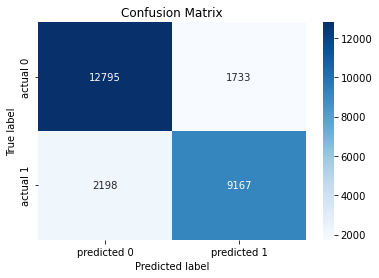

In [48]:
# Assuming y_test and y_pred are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')

In [49]:
# Access the best hyperparameters
best_params = grid.best_params_
print(best_params)

{'C': 1}


# ANN

In [27]:
from sklearn.neural_network import MLPClassifier

# Define the ANN model
mlp = MLPClassifier()

# Fit the mlp object to the training data with PCA features
mlp.fit(X_train_pca, Y_train)

# Predict using the mlp object on the testing data with PCA features
y_pred = mlp.predict(X_test_pca)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14528
           1       0.93      0.91      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.93      0.93     25893
weighted avg       0.93      0.93      0.93     25893



In [28]:
# Calculate accuracy
accuracy7 = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy7)

Accuracy: 0.9317962383655815


Text(0.5, 1.0, 'Confusion Matrix')

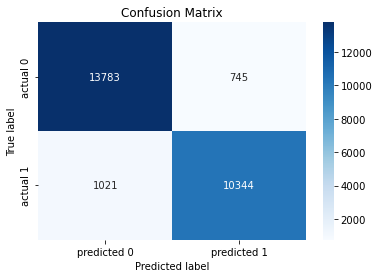

In [29]:
# Assuming y_test and y_pred are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')

# SVC

In [30]:
from sklearn.svm import SVC

# Define the SVC classifier
svc = SVC()

# Fit the svc object to the training data with PCA features
svc.fit(X_train_pca, Y_train)

# Predict using the svc object on the testing data with PCA features
y_pred = svc.predict(X_test_pca)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14528
           1       0.92      0.91      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.92      0.93     25893
weighted avg       0.93      0.93      0.93     25893



In [31]:
# Calculate accuracy
accuracy8 = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy8)

Accuracy: 0.9263507511682694


Text(0.5, 1.0, 'Confusion Matrix')

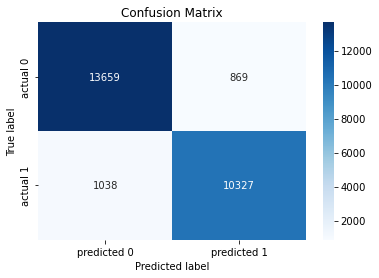

In [32]:
# Assuming y_test and y_pred are your actual and predicted target values, respectively
# create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['predicted 0', 'predicted 1'], 
            yticklabels=['actual 0', 'actual 1'])

# add labels for the x-axis and y-axis
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add a title to the plot
plt.title('Confusion Matrix')